## Feature Selection

- Create scikit learn basic pipeline
- Standardize the train data (Done in 8)
- Options :
    - Regularization (glmnet) (Lasso, Ridge, Elastic Net)
    - PCA , MCA
    - Trees - Feature Importance (Random Forest - with filter, Decision Tree)
    - VIF testing
    - Forward Selection
    - Backward Selection    
    - Recursive Feature Elimination
    - Feature Importance (Random Forest, Decision Tree)
    - Correlation Matrix
    


In [1]:
import pandas as pd
import numpy as np
import os

#for multicollinearity issues
from statsmodels.stats.outliers_influence import variance_inflation_factor

#for correlation heat max
import seaborn as sns
from matplotlib import pyplot as plt

#for ttest
from scipy import stats 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [3]:
file_location =  '/Users/chewy2.0/Capstone/data' ##change as necessary
os.chdir(file_location)

## this is for the log regression 

In [4]:
train = pd.read_csv('Log_train_standardized.csv', dtype = {'GEOID':'str'}, low_memory = False)

In [5]:
cat_columns = ['already_granted', 'r1', 'r2', 'special_focus','bea_region', 'Agriculture_Forestry_Fishing_Hunting_base', 
               'Mining_Quarrying_and_Oil_Gas_Extraction_base', 'Utilities_base', 'Construction_base',
               'Manufacturing_base', 'Wholesale_Trade_base', 'Retail_Trade_base', 'Transportation_Warehousing_base',
               'Information_base', 'Finance_Insurance_base', 'Real_Estate_Rental_Leasing_base', 
               'Professional_Scientific_and_Technical_Services_base', 'Management_of_Companies_Enterprises_base', 
               'Administrative_Support_Waste_Management_Remediation_Services_base', 'Educational_Services_base',
               'Health_Care_Social_Assistance_base', 'Arts_Entertainment_and_Recreation_base', 'Accommodation_Food_Services_base',
               'Other_Services_except_Public_Administration_base', 'women_involved']

train[cat_columns] = train[cat_columns].astype('category')

In [6]:
train.sample(5)

,patent_num,assignee,grant_yr,app_yr,app_num,GEOID,ipc,team_size,men_inventors,women_inventors,already_granted,assignee_univ_map,Institution,Control,r1,r2,special_focus,Over25_Less9Grade,Over25_SomeHS,Over25_HSGrad,Over25_SomeCollege,Over25_Assosc,Over25_Bach,Over25_Grad,bea_region,Agriculture_Forestry_Fishing_Hunting,Mining_Quarrying_and_Oil_Gas_Extraction,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate_Rental_Leasing,Professional_Scientific_and_Technical_Services,Management_of_Companies_Enterprises,Administrative_Support_Waste_Management_Remediation_Services,Educational_Services,Health_Care_Social_Assistance,Arts_Entertainment_and_Recreation,Accommodation_Food_Services,Other_Services_except_Public_Administration,qp1,ap,est,Agriculture_Forestry_Fishing_Hunting_base,Mining_Quarrying_and_Oil_Gas_Extraction_base,Utilities_base,Construction_base,Manufacturing_base,Wholesale_Trade_base,Retail_Trade_base,Transportation_Warehousing_base,Information_base,Finance_Insurance_base,Real_Estate_Rental_Leasing_base,Professional_Scientific_and_Technical_Services_base,Management_of_Companies_Enterprises_base,Administrative_Support_Waste_Management_Remediation_Services_base,Educational_Services_base,Health_Care_Social_Assistance_base,Arts_Entertainment_and_Recreation_base,Accommodation_Food_Services_base,Other_Services_except_Public_Administration_base,GDP,pop_gt_16,pop_gt_16_lf,pop_gt_16_lf_c,Pop_Est,Earnings_by_place_of_work,Employee_and_self-employed_contributions_for_government_social_insurance,Employer_contributions_for_employee_pension_and_insurance_funds,Employer_contributions_for_government_social_insurance,Equals_Net_earnings_by_place_of_residence,Farm_income,Farm_proprietors_income,Less_Contributions_for_government_social_insurance,Nonfarm_personal_income,Nonfarm_proprietors_income,Per_capita_personal_income_dollars,Personal_income_thousands_of_dollars,Plus_Adjustment_for_residence,Plus_Dividends_interest_and_rent,Plus_Personal_current_transfer_receipts,Population_persons,Proprietors_employment,Proprietors_income,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries,Population_Estimate,Applications,Award_Amount,women_involved,GDP_by_labor_force,ap_by_est,est_by_pop_gt_16_lf,apps_by_pop_gt_16_lf,Wages_by_pop_gt_16_lf,Award_by_pop_gt_16_lf,ipc_A,ipc_B,ipc_C,ipc_D,ipc_E,ipc_F,ipc_G,ipc_H,num_ipcs
1094757,9278914,UNIVERSITY OF IOWA RESEARCH FOUNDATION,2016.0,2014,14168993,47093,A C,-0.001001,0.271086,-0.480672,1,university of iowa,university of iowa,Public,1,0,0,-0.808446,-0.043345,0.676378,0.219861,0.713256,-0.293020,-0.398893,Southeast,0.000000,0.070895,0.000000,0.828324,0.537650,1.241040,1.143392,0.964209,0.992236,1.000254,1.006037,0.633273,1.113173,1.692070,0.471193,1.037472,0.543058,1.075184,1.175828,2005664,8258587,10949,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1,1,22826494,355977,-0.669634,226917,-0.646862,-0.797913,-0.775525,-0.770815,-0.837568,-0.834079,-0.564173,-0.497418,-0.807989,-0.817006,-0.602280,-0.836798,-0.817499,0.341460,-0.858467,-0.593031,-0.652198,-0.638738,-0.605167,-0.795008,-0.703602,-0.719069,-0.821122,-0.651972,-0.727045,-0.475872,0,-0.693394,-0.674357,-0.297902,-0.830707,-0.622314,-0.342051,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.528801
120982,NaN,Caterpillar Inc.,NaN,2015,14610264,17143,NaN,-0.483224,-0.281908,-0.480672,0,caterpillar inc.,NaN,NaN,0,0,0,-1.144359,0.229276,1.045420,1.141067,1.756143,-0.962665,-0.981268,Great Lakes,0.049806,0.061288,1.484827,0.578036,0.584078,0.664598,0.779401,0.428718,0.646203,0.678547,0.543397,0.641708,0.000000,0.937085,1.119363,1.335124,0.974039,0.702560,1.500129,890181,3750195,4475,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,11875361,147041,-0.818709,93759,-0.792901,-0.895321,-0.887269,-0.858570,-0.927605,-0.949834,-0.533656,-0.460645,-0.910098,-0.928300,-0.759508,-0.637561,-0.928711,0.346278,-0.939677,-0.712052,-0.801252,-0.804433,-0.762147,-0.883844,-0.865671,-0.8

In [7]:
validation_data = pd.read_csv('Log_validation_standardized.csv', dtype = {'GEOID':'str'}, low_memory = False)
validation_data[cat_columns] = validation_data[cat_columns].astype('category')
validation_data.head()

,patent_num,assignee,grant_yr,app_yr,app_num,GEOID,ipc,team_size,men_inventors,women_inventors,already_granted,assignee_univ_map,Institution,Control,r1,r2,special_focus,Over25_Less9Grade,Over25_SomeHS,Over25_HSGrad,Over25_SomeCollege,Over25_Assosc,Over25_Bach,Over25_Grad,bea_region,Agriculture_Forestry_Fishing_Hunting,Mining_Quarrying_and_Oil_Gas_Extraction,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate_Rental_Leasing,Professional_Scientific_and_Technical_Services,Management_of_Companies_Enterprises,Administrative_Support_Waste_Management_Remediation_Services,Educational_Services,Health_Care_Social_Assistance,Arts_Entertainment_and_Recreation,Accommodation_Food_Services,Other_Services_except_Public_Administration,qp1,ap,est,Agriculture_Forestry_Fishing_Hunting_base,Mining_Quarrying_and_Oil_Gas_Extraction_base,Utilities_base,Construction_base,Manufacturing_base,Wholesale_Trade_base,Retail_Trade_base,Transportation_Warehousing_base,Information_base,Finance_Insurance_base,Real_Estate_Rental_Leasing_base,Professional_Scientific_and_Technical_Services_base,Management_of_Companies_Enterprises_base,Administrative_Support_Waste_Management_Remediation_Services_base,Educational_Services_base,Health_Care_Social_Assistance_base,Arts_Entertainment_and_Recreation_base,Accommodation_Food_Services_base,Other_Services_except_Public_Administration_base,GDP,pop_gt_16,pop_gt_16_lf,pop_gt_16_lf_c,Pop_Est,Earnings_by_place_of_work,Employee_and_self-employed_contributions_for_government_social_insurance,Employer_contributions_for_employee_pension_and_insurance_funds,Employer_contributions_for_government_social_insurance,Equals_Net_earnings_by_place_of_residence,Farm_income,Farm_proprietors_income,Less_Contributions_for_government_social_insurance,Nonfarm_personal_income,Nonfarm_proprietors_income,Per_capita_personal_income_dollars,Personal_income_thousands_of_dollars,Plus_Adjustment_for_residence,Plus_Dividends_interest_and_rent,Plus_Personal_current_transfer_receipts,Population_persons,Proprietors_employment,Proprietors_income,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries,Population_Estimate,Applications,Award_Amount,women_involved,GDP_by_labor_force,ap_by_est,est_by_pop_gt_16_lf,apps_by_pop_gt_16_lf,Wages_by_pop_gt_16_lf,Award_by_pop_gt_16_lf,ipc_A,ipc_B,ipc_C,ipc_D,ipc_E,ipc_F,ipc_G,ipc_H,num_ipcs
0,D810362,GENTEX CORPORATION,2018.0,2015,29521510,42069,NaN,-0.001001,-0.281908,1.031122,1,gentex corporation,NaN,NaN,0,0,0,-1.032388,0.183839,2.505542,-0.384681,1.265372,-1.336878,-1.197578,Mideast,0.098722,0.125785,0.941894,0.645993,0.978223,0.965112,1.089195,1.420060,0.907481,1.123399,0.378898,0.464805,0.531173,0.484433,3.056985,1.479250,0.690981,0.820926,0.866902,830944,3412434,5333,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,9152583,175718,-0.806453,104845,-0.777730,-0.911979,-0.897772,-0.867129,-0.943091,-0.957076,-0.558635,-0.479354,-0.922976,-0.927165,-0.742840,-0.876400,-0.927611,0.380810,-0.947751,-0.662513,-0.786765,-0.789001,-0.745594,-0.894618,-0.864396,-0.882042,-0.929853,-0.786412,-0.821567,-0.472249,1,-0.853693,-0.889485,-0.060279,-1.068849,-0.824213,-0.089456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.935243
1,NaN,NORTHROP GRUMMAN SYSTEMS CORPORATION,NaN,2012,13603788,06037,NaN,-0.483224,-0.281908,-0.480672,0,northrop grumman systems corporation,NaN,NaN,0,0,0,2.774633,1.728687,-0.206114,0.191073,-0.329631,-0.765710,-0.997907,Far West,0.084914,0.103953,0.000000,0.636276,1.002212,1.348362,0.827077,1.166904,2.031002,0.853103,1.321990,1.308068,0.805615,1.037853,1.249140,0.842209,1.244642,0.935039,0.950407,45249168,186494003,249625,0,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,576713190,7737011,4.719171,5039725,4.765421,3.328665,2.610017,3.683171,3.295966,3.918018,0.868573,0.399928,2.942107,4.050828,4.404904,-0.608780,4.050565,-0.444999,3.759501,4.538342,4.751978,4.607133,4.406552,3.576538,4.188188,4.026071,2.972366,4.751754,4

In [41]:
# lists the variables by num / cat
categorical = [
#'ipc',
#'ipc_A',
#'ipc_B',
#'ipc_C',
#'ipc_D',
#'ipc_E',
#'ipc_F',
#'ipc_G',
#'ipc_H',
'already_granted',
#'Control',
'r1',
'r2',
'special_focus',
#'bea_region',
#'Agriculture_Forestry_Fishing_Hunting_base',
# 'Mining_Quarrying_and_Oil_Gas_Extraction_base',
# 'Utilities_base',
# 'Construction_base',
# 'Manufacturing_base',
# 'Wholesale_Trade_base',
# 'Retail_Trade_base',
# 'Transportation_Warehousing_base',
# 'Information_base',
# 'Finance_Insurance_base',
# 'Real_Estate_Rental_Leasing_base',
# 'Professional_Scientific_and_Technical_Services_base',
# 'Management_of_Companies_Enterprises_base',
# 'Administrative_Support_Waste_Management_Remediation_Services_base',
# 'Educational_Services_base',
# 'Health_Care_Social_Assistance_base',
# 'Arts_Entertainment_and_Recreation_base',
# 'Accommodation_Food_Services_base',
# 'Other_Services_except_Public_Administration_base'
]

numeric = [
 'num_ipcs',
 #'team_size',
 #'men_inventors',
 #'women_inventors',
 'Over25_Less9Grade',
 'Over25_SomeHS',
 'Over25_HSGrad',
 'Over25_SomeCollege',
 'Over25_Assosc',
 'Over25_Bach',
 'Over25_Grad',
 'ap_by_est',
 'pop_gt_16_lf',
 'est_by_pop_gt_16_lf',
 'Total_employment',
 'Pop_Est',
 #'Population_Estimate',
 'Population_persons',
 'Earnings_by_place_of_work',
 'Employee_and_self-employed_contributions_for_government_social_insurance',
 'Employer_contributions_for_employee_pension_and_insurance_funds',
 'Employer_contributions_for_government_social_insurance',
 'Equals_Net_earnings_by_place_of_residence',
 'Farm_income',
 'Farm_proprietors_income',
 'Less_Contributions_for_government_social_insurance',
 'Nonfarm_personal_income',
 'Nonfarm_proprietors_income',
 'Per_capita_personal_income_dollars',
 'Personal_income_thousands_of_dollars',
 'Plus_Adjustment_for_residence',
 'Plus_Dividends_interest_and_rent',
 'Plus_Personal_current_transfer_receipts',	
 'Proprietors_employment',
 'Proprietors_income',
 'Supplements_to_wages_and_salaries',
 'Wage_and_salary_employment',
 'Wages_and_salaries',
 'Applications',
 'Award_Amount',
 'GDP_by_labor_force',
 'apps_by_pop_gt_16_lf',
 'Wages_by_pop_gt_16_lf',
 'Award_by_pop_gt_16_lf',
 'Agriculture_Forestry_Fishing_Hunting',
'Mining_Quarrying_and_Oil_Gas_Extraction',
'Utilities',
'Construction',
'Manufacturing',
'Wholesale_Trade',
'Retail_Trade',
'Transportation_Warehousing',
'Information',
'Finance_Insurance',
'Real_Estate_Rental_Leasing',
'Professional_Scientific_and_Technical_Services',
'Management_of_Companies_Enterprises',
'Administrative_Support_Waste_Management_Remediation_Services',
'Educational_Services',
'Health_Care_Social_Assistance',
'Arts_Entertainment_and_Recreation',
'Accommodation_Food_Services',
'Other_Services_except_Public_Administration'
]

# Need to deal with Multicollinarity

- if features coorelated with other features will jack up the selection of best predictors 
    - pairs plot 
    - VIF? 

## This is for all all numeric variables

In [13]:
#gathers the numeric columns only
num_vars = train[numeric]

#get rid of inf's and nans
#num_vars = num_vars[~num_vars.isin([np.nan, np.inf, -np.inf]).any(1)]

#look at dimensions
num_vars.shape

(1374290, 59)

In [14]:
#empty df for vif info
vif_data = pd.DataFrame()

#add columns
# feature has all the columns from the num_var df (numeric columns of train dataset)
vif_data["feature"] = num_vars.columns
# VIF column 
vif_data["VIF"] = [variance_inflation_factor(num_vars.values, i) for i in range(len(num_vars.columns))]

In [16]:
vif_data.sort_values(by = 'VIF', ascending = False)

,feature,VIF
20,Farm_proprietors_income,86601.408993
11,Total_employment,64561.244288
21,Less_Contributions_for_government_social_insur...,27952.392951
19,Farm_income,27353.049751
15,Employee_and_self-employed_contributions_for_g...,9971.075251
6,Over25_Bach,3883.503068
26,Plus_Adjustment_for_residence,3588.641068
25,Personal_income_thousands_of_dollars,2760.745631
9,pop_gt_16_lf,2704.825720
16,Employer_contributions_for_employee_pension_an...,1926.243075


## Now with fewer variables to hopefully lower the VIFS???

In [42]:
limited_numeric = [
 #'num_ipcs',
 #'team_size',
 #'men_inventors',
 #'women_inventors',
 #'Over25_Less9Grade',
 #'Over25_SomeHS',
 #'Over25_HSGrad',
 #'Over25_SomeCollege',
 #'Over25_Assosc',
 #'Over25_Bach',
 'Over25_Grad',
 #'ap_by_est',
 #'pop_gt_16_lf',
 #'est_by_pop_gt_16_lf',
 #'Total_employment',
 'Pop_Est',
 #'Population_Estimate',
 #'Population_persons',
 #'Earnings_by_place_of_work',
 #'Employee_and_self-employed_contributions_for_government_social_insurance',
 #'Employer_contributions_for_employee_pension_and_insurance_funds',
 #'Employer_contributions_for_government_social_insurance',
 #'Equals_Net_earnings_by_place_of_residence',
 'Farm_income',
 #'Farm_proprietors_income',
 #'Less_Contributions_for_government_social_insurance',
 #'Nonfarm_personal_income',
 #'Nonfarm_proprietors_income',
 #'Per_capita_personal_income_dollars',
 #'Personal_income_thousands_of_dollars',
 #'Plus_Adjustment_for_residence',
 #'Plus_Dividends_interest_and_rent',
 #'Plus_Personal_current_transfer_receipts',
 #'Proprietors_employment',
 #'Proprietors_income',
 #'Supplements_to_wages_and_salaries',
 #'Wage_and_salary_employment',
 #'Wages_and_salaries',
 #'Applications',
 #'Award_Amount',
 'GDP_by_labor_force',
 'apps_by_pop_gt_16_lf',
 #'Wages_by_pop_gt_16_lf',
 'Award_by_pop_gt_16_lf',
 'Agriculture_Forestry_Fishing_Hunting',
'Mining_Quarrying_and_Oil_Gas_Extraction',
'Utilities',
'Construction',
'Manufacturing',
'Wholesale_Trade',
'Retail_Trade',
'Transportation_Warehousing',
'Information',
'Finance_Insurance',
'Real_Estate_Rental_Leasing',
'Professional_Scientific_and_Technical_Services',
'Management_of_Companies_Enterprises',
'Administrative_Support_Waste_Management_Remediation_Services',
'Educational_Services',
'Health_Care_Social_Assistance',
'Arts_Entertainment_and_Recreation',
'Accommodation_Food_Services',
'Other_Services_except_Public_Administration'
]

In [43]:
#gathers the numeric columns only
num_vars_2 = train[limited_numeric]

#get rid of inf's and nans
#num_vars_2 = num_vars_2[~num_vars_2.isin([np.nan, np.inf, -np.inf]).any(1)]

#look at dimensions
num_vars_2.shape

(1374290, 25)

In [44]:
#empty df for vif info
vif_data_2 = pd.DataFrame()

#add columns
# feature has all the columns from the num_var df (numeric columns of train dataset)
vif_data_2["feature"] = num_vars_2.columns
# VIF column 
vif_data_2["VIF"] = [variance_inflation_factor(num_vars_2.values, i) for i in range(len(num_vars_2.columns))]

In [45]:
vif_data_2.sort_values(by = 'VIF', ascending = False)

,feature,VIF
12,Retail_Trade,45.786752
21,Health_Care_Social_Assistance,27.139209
16,Real_Estate_Rental_Leasing,24.705951
19,Administrative_Support_Waste_Management_Remedi...,23.962483
23,Accommodation_Food_Services,22.447965
24,Other_Services_except_Public_Administration,19.923333
9,Construction,15.672252
17,Professional_Scientific_and_Technical_Services,15.094723
11,Wholesale_Trade,13.500075
22,Arts_Entertainment_and_Recreation,9.631413


In [36]:
#num_vars_2.corr()

In [46]:
my_corr = num_vars_2.corr()

Text(0.5, 1.0, 'Correlation Between Limited Numeric Info')

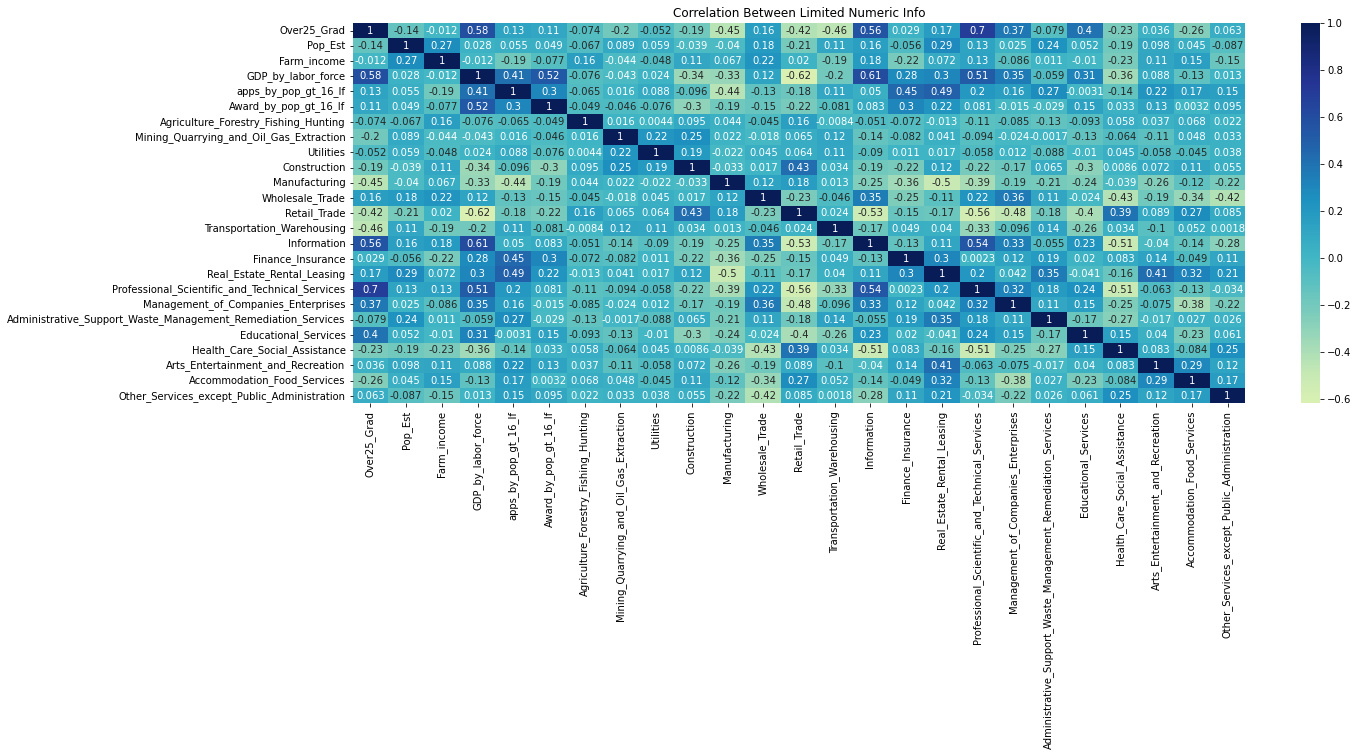

In [47]:
plt.figure(figsize = (20,7))
sns.heatmap(my_corr, center=0,  annot=True, cmap='YlGnBu')
plt.title("Correlation Between Limited Numeric Info")

### Lasso for Feature Selection 
- not important features got to zero

In [28]:
### from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
#with cross validation and l1 (lasso)
#model = LogisticRegressionCV(solver='saga', random_state=0, penalty = 'elasticnet', cv = 2, l1_ratios = [0.5,0.5])

# without cross validation
model = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l1')


In [24]:
# shouldn't need this since all nan's fixed???
#train_no_nans = train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]
#train_no_nans.shape

In [25]:
# validation_no_nans = validation_data[~validation_data.isin([np.nan, np.inf, -np.inf]).any(1)]
# validation_no_nans.shape

In [30]:
#model.fit(train_no_nans[numeric], train_no_nans['women_involved'])
model.fit(train[numeric], train['women_involved'])


# clf = linear_model.LogisticRegression(
#     penalty="l1",
#     solver="liblinear",
#     tol=1e-6,
#     max_iter=int(1e6),
#     warm_start=True,
#     intercept_scaling=10000.0,
# )

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [25]:
#[print(i) for i in train.columns]


In [31]:
df = pd.DataFrame()
df['var'] = train[numeric].columns
df['coef'] = model.coef_[0]
#df['magnitude_coef']= np.abs(model.coef_[0])

In [32]:
df.sort_values(by = 'coef', key = abs, ascending = False)

,var,coef
17,Employer_contributions_for_government_social_i...,0.640439
33,Wages_and_salaries,-0.538690
12,Pop_Est,-0.524470
31,Supplements_to_wages_and_salaries,0.469453
16,Employer_contributions_for_employee_pension_an...,0.419914
26,Plus_Adjustment_for_residence,0.341340
14,Earnings_by_place_of_work,-0.295250
18,Equals_Net_earnings_by_place_of_residence,-0.288839
8,ap_by_est,0.287918
9,pop_gt_16_lf,0.242057


In [33]:
# now with the limited variables 
model_limited = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l1')

#now fit
model_limited.fit(train[limited_numeric], train['women_involved'])


LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [34]:
df_limited = pd.DataFrame()
df_limited['var'] = train[limited_numeric].columns
df_limited['coef'] = model_limited.coef_[0]
#df_limited['magnitude_coef']= np.abs(model_limited.coef_[0])
df_limited.sort_values(by = 'coef', key = abs, ascending = False)

,var,coef
13,Retail_Trade,-0.326643
20,Administrative_Support_Waste_Management_Remedi...,-0.207542
24,Accommodation_Food_Services,-0.186209
0,Over25_Grad,0.185226
11,Manufacturing,-0.151874
18,Professional_Scientific_and_Technical_Services,-0.139302
22,Health_Care_Social_Assistance,0.125244
14,Transportation_Warehousing,0.122334
17,Real_Estate_Rental_Leasing,0.088634
15,Information,-0.063384


## See how it did using the validation 

- with all numeric vars

In [35]:
y_pred = model.predict(validation_data[numeric])
print(confusion_matrix(validation_data['women_involved'], y_pred))
print(classification_report(validation_data['women_involved'], y_pred))

[[129041      0]
 [ 40815      1]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86    129041
           1       1.00      0.00      0.00     40816

    accuracy                           0.76    169857
   macro avg       0.88      0.50      0.43    169857
weighted avg       0.82      0.76      0.66    169857



In [100]:
#adjust the trheshold 
#y_pred2 = (model_limited.predict_proba(validation_data[limited_numeric])[:,1] >= 0.2).astype(bool) # set threshold as 0.3


In [36]:
# with limited numerics
y_pred2 = model_limited.predict(validation_data[limited_numeric])
print(confusion_matrix(validation_data['women_involved'], y_pred2))
print(classification_report(validation_data['women_involved'], y_pred2))

[[129041      0]
 [ 40816      0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86    129041
           1       0.00      0.00      0.00     40816

    accuracy                           0.76    169857
   macro avg       0.38      0.50      0.43    169857
weighted avg       0.58      0.76      0.66    169857



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Now with Elastinet

In [32]:
#with cross validation and l1 (lasso)
#model = LogisticRegressionCV(solver='saga', random_state=0, penalty = 'elastinet', cv = 2, l1_ratios = [0.5,0.5])

# without cross validation
model2 = LogisticRegression(solver='saga', random_state=0, penalty = 'elasticnet', l1_ratio = 0.5, max_iter = 10000)

In [33]:
model2.fit(train[numeric], train['women_involved'])


LogisticRegression(l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   random_state=0, solver='saga')

In [43]:
df2 = pd.DataFrame()
df2['var'] = train[numeric].columns
df2['coef'] = model2.coef_[0]
df2['magnitude_coef']= np.abs(model2.coef_[0])

In [44]:
df2.sort_values(by ='magnitude_coef', ascending = False)

,var,coef,magnitude_coef
1,team_size,7.679888e+00,7.679888e+00
2,men_inventors,-6.605834e+00,6.605834e+00
11,pop_gt_16_lf,3.480415e+00,3.480415e+00
14,Pop_Est,-2.818090e+00,2.818090e+00
32,Proprietors_employment,-7.774617e-01,7.774617e-01
31,Plus_Personal_current_transfer_receipts,5.166418e-01,5.166418e-01
15,Population_Estimate,-4.887696e-01,4.887696e-01
35,Wage_and_salary_employment,3.919297e-01,3.919297e-01
20,Employer_contributions_for_government_social_i...,-3.535063e-01,3.535063e-01
36,Wages_and_salaries,-2.753460e-01,2.753460e-01


In [36]:
y_pred2 = model2.predict(validation_data[numeric])
print(confusion_matrix(validation_data['women_involved'], y_pred2))
print(classification_report(validation_data['women_involved'], y_pred2))

[[119276   9765]
 [  8973  31843]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93    129041
           1       0.77      0.78      0.77     40816

    accuracy                           0.89    169857
   macro avg       0.85      0.85      0.85    169857
weighted avg       0.89      0.89      0.89    169857



In [102]:
# now with limited variables 
model2_limited = LogisticRegression(solver='saga', random_state=0, penalty = 'elasticnet', l1_ratio = 0.5, max_iter = 10000)

#fit the model
model2_limited.fit(train[limited_numeric], train['women_involved'])


LogisticRegression(l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   random_state=0, solver='saga')

In [103]:
df2_limited = pd.DataFrame()
df2_limited['var'] = train[limited_numeric].columns
df2_limited['coef'] = model2_limited.coef_[0]
df2_limited.sort_values(by ='coef', key = abs,  ascending = False)

,var,coef
1,Over25_Grad,0.167343
2,ap_by_est,-0.034227
5,GDP_by_labor_force,0.033993
0,num_ipcs,-0.033582
7,Award_by_pop_gt_16_lf,0.021096
6,apps_by_pop_gt_16_lf,-0.019553
3,Pop_Est,0.008282
4,Farm_income,-0.001456


In [105]:
df_limited.sort_values(by ='coef', key = abs,  ascending = False)

,var,coef
1,Over25_Grad,0.167344
2,ap_by_est,-0.034160
5,GDP_by_labor_force,0.033914
0,num_ipcs,-0.033579
7,Award_by_pop_gt_16_lf,0.021123
6,apps_by_pop_gt_16_lf,-0.019525
3,Pop_Est,0.008274
4,Farm_income,-0.001449


# check for correlation with the response variable

In [37]:
#enough evidence to say that mean value of continuous variable is different for women_involved

# H0: u for women involved = u for women NOt involved 
#separate values 
def cat_cont_id_ttest():
    for i in range(len(numeric)):
        print(numeric[i])
        no_women = train.query("women_involved == 0")[numeric[i]]
        women = train.query("women_involved == 1")[numeric[i]]
        print(stats.ttest_ind(no_women, women, equal_var = False))

In [38]:
cat_cont_id_ttest()

#not important variables
#less 9thgrade, total employment, wage and salary emloyment

num_ipcs
Ttest_indResult(statistic=14.381548299411667, pvalue=6.892286520625126e-47)
Over25_Less9Grade
Ttest_indResult(statistic=-1.577703855325242, pvalue=0.11463419986223415)
Over25_SomeHS
Ttest_indResult(statistic=45.24405758593537, pvalue=0.0)
Over25_HSGrad
Ttest_indResult(statistic=49.111690532225936, pvalue=0.0)
Over25_SomeCollege
Ttest_indResult(statistic=84.36534937239904, pvalue=0.0)
Over25_Assosc
Ttest_indResult(statistic=58.468577825021555, pvalue=0.0)
Over25_Bach
Ttest_indResult(statistic=-54.26890850816165, pvalue=0.0)
Over25_Grad
Ttest_indResult(statistic=-85.05208787458554, pvalue=0.0)
ap_by_est
Ttest_indResult(statistic=-44.866220567432656, pvalue=0.0)
pop_gt_16_lf
Ttest_indResult(statistic=7.195023273840791, pvalue=6.252527367538481e-13)
est_by_pop_gt_16_lf
Ttest_indResult(statistic=-37.02106709329154, pvalue=1.2996931319836597e-299)
Total_employment
Ttest_indResult(statistic=0.07348353711638465, pvalue=0.9414213697842445)
Pop_Est
Ttest_indResult(statistic=9.4238835618

In [39]:
# side by side boxplots 

plt.figure(figsize = (10,7))
def box_machine():
    for i in range(len(numeric)):
        sns.boxplot(x = 'women_involved', y = numeric[i], data = train)
        plt.title(numeric[i])
        plt.show()

<Figure size 720x504 with 0 Axes>

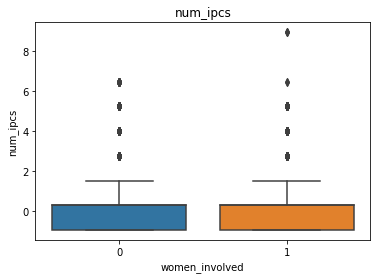

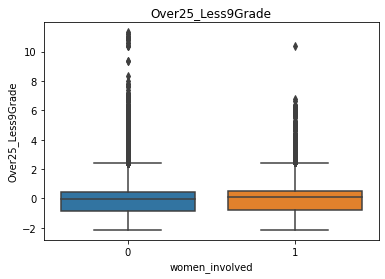

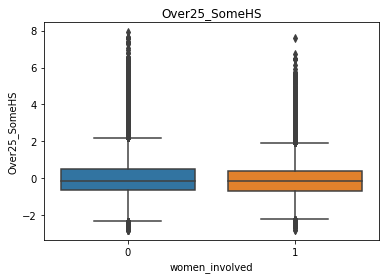

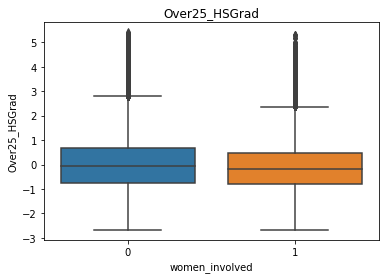

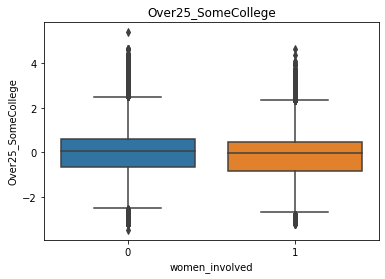

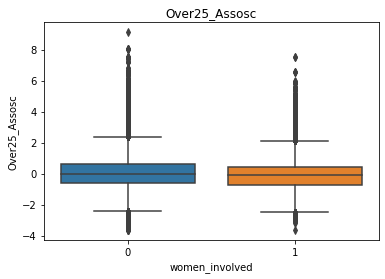

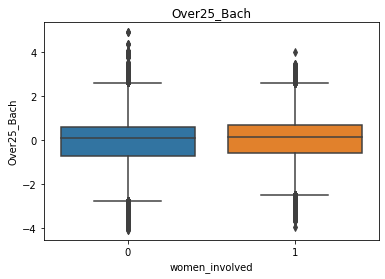

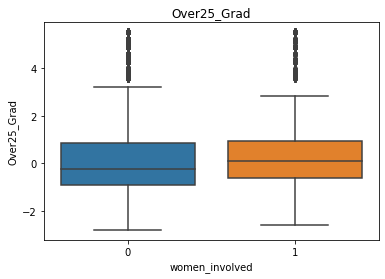

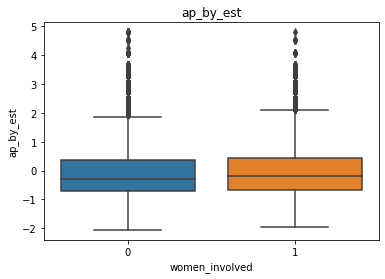

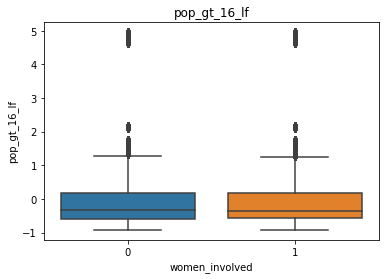

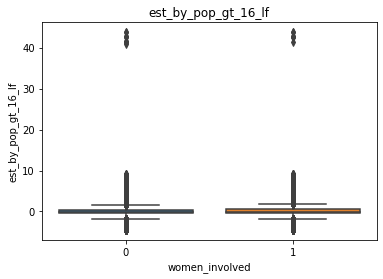

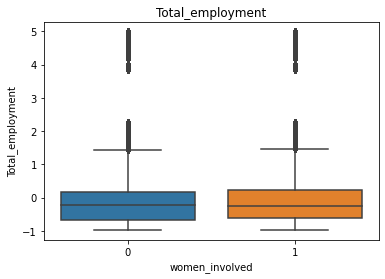

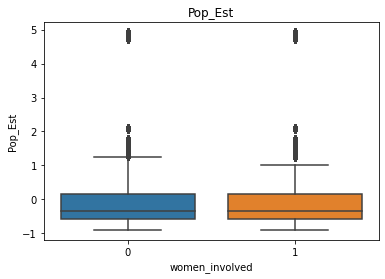

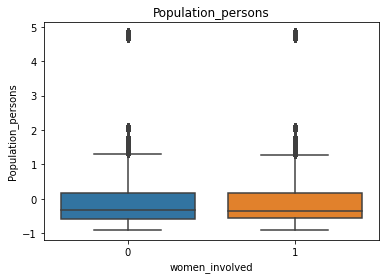

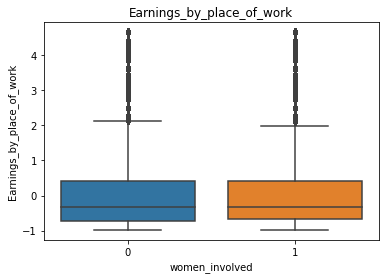

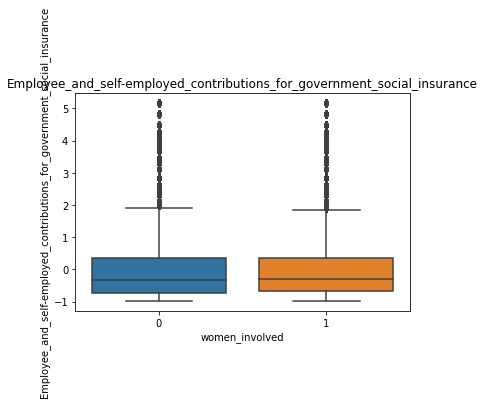

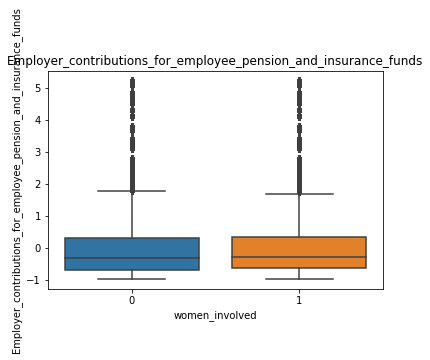

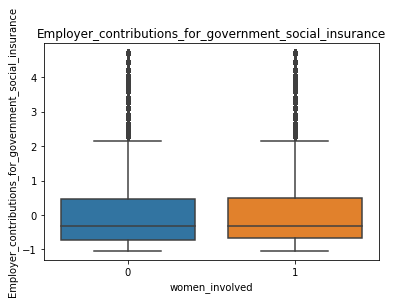

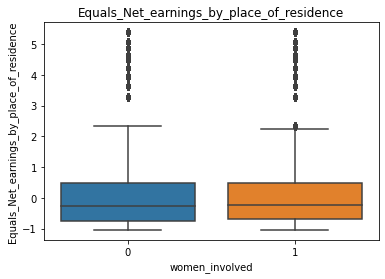

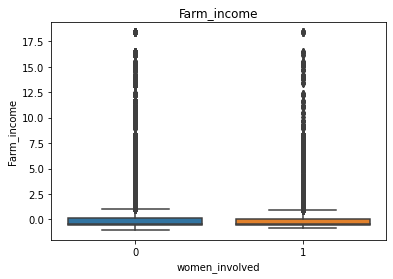

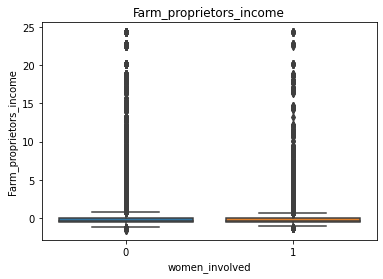

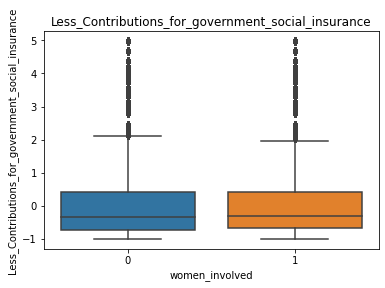

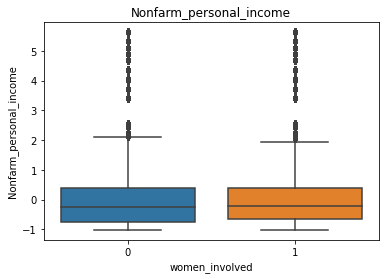

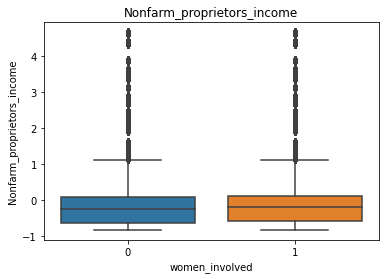

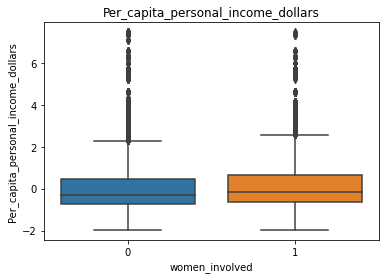

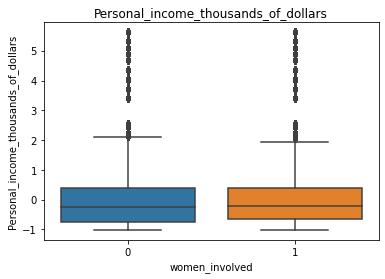

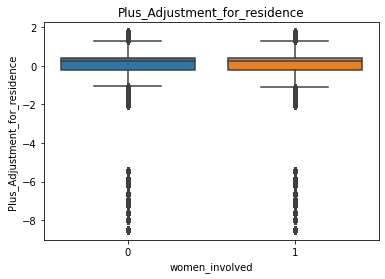

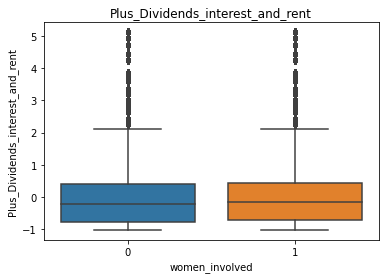

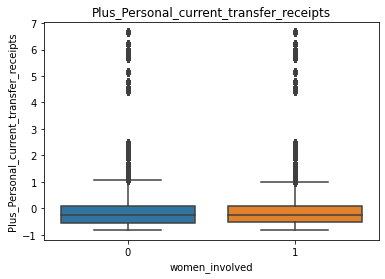

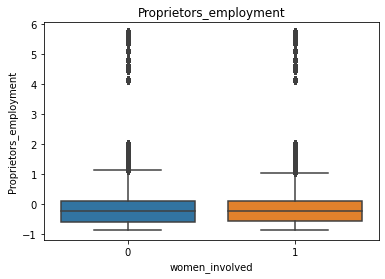

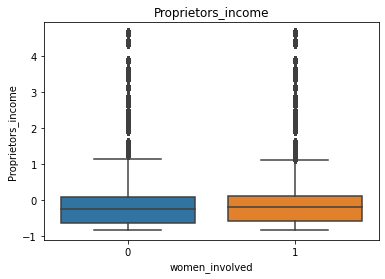

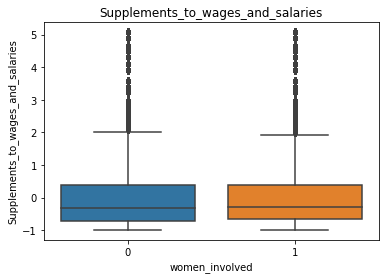

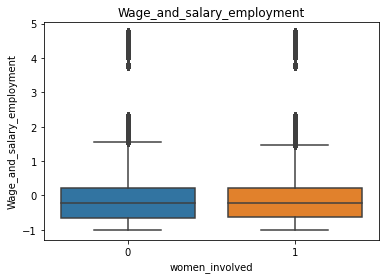

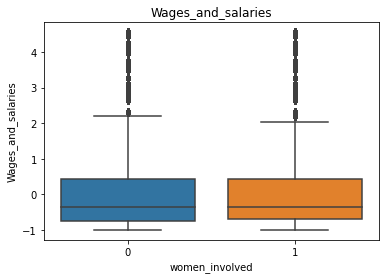

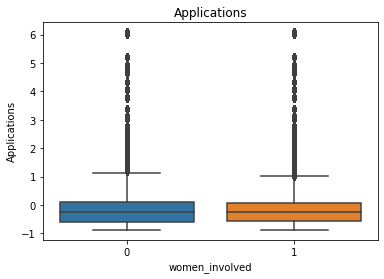

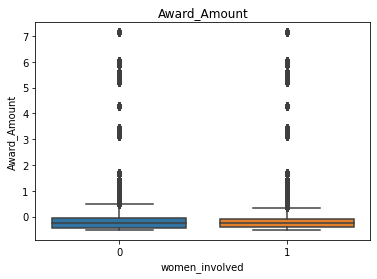

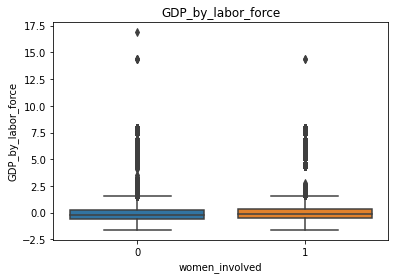

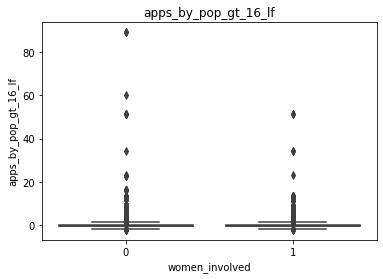

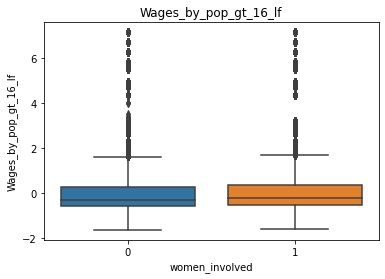

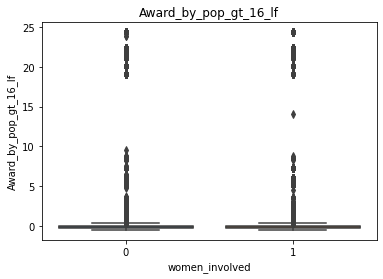

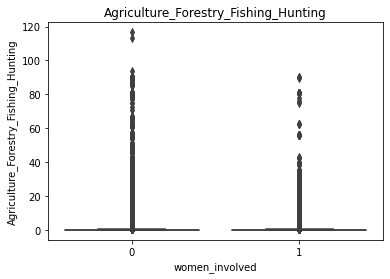

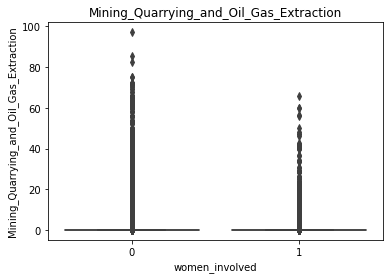

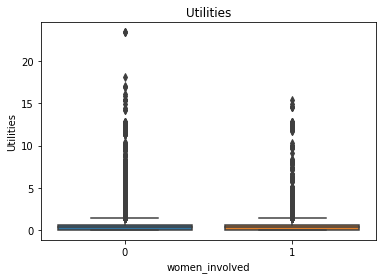

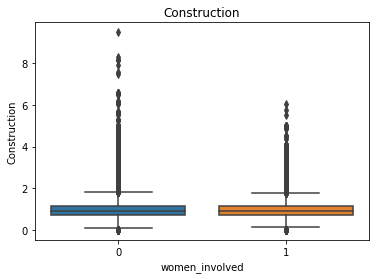

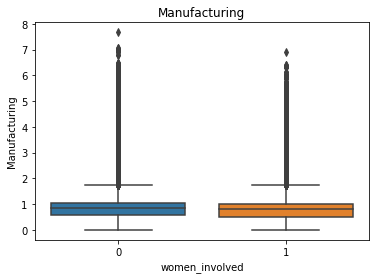

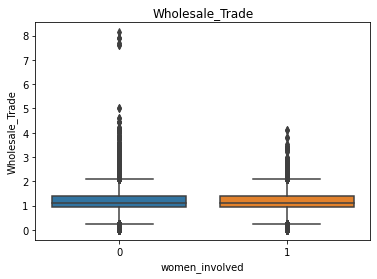

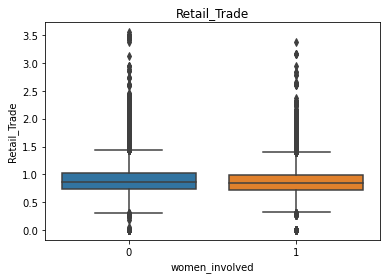

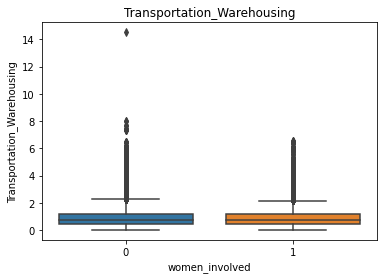

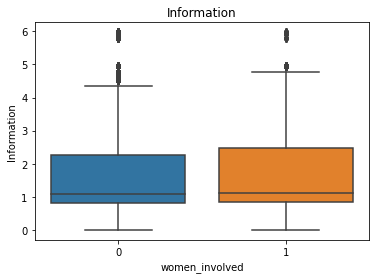

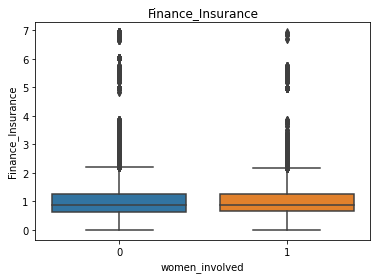

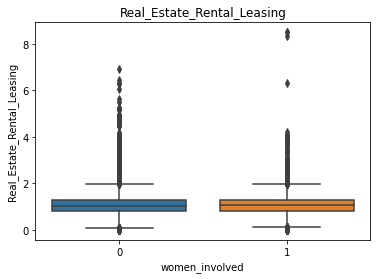

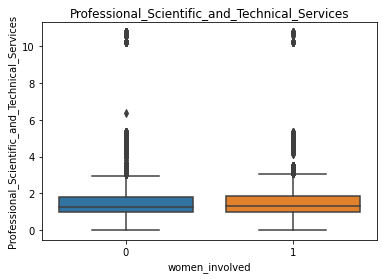

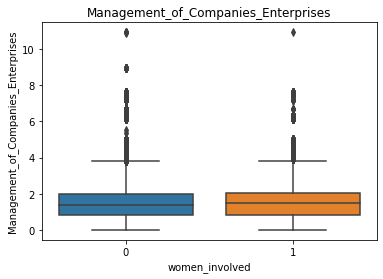

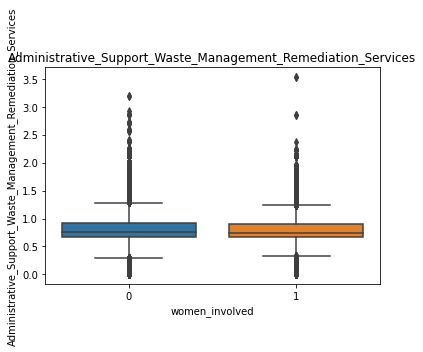

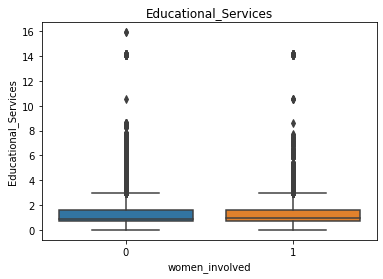

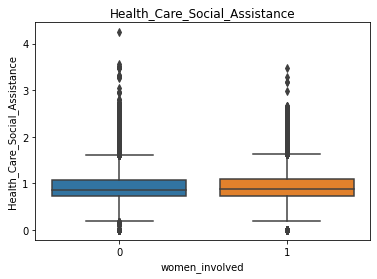

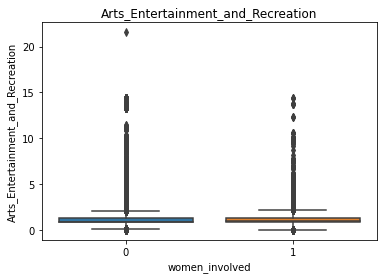

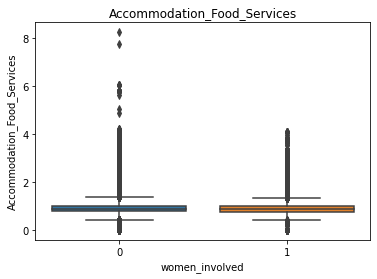

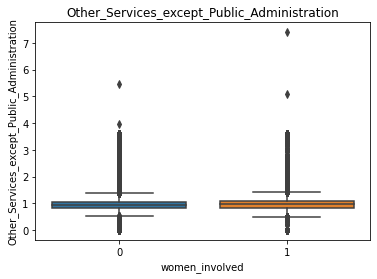

In [40]:
box_machine()

## Lasso with limited numeric and categorical

In [50]:
# one hot encoding for categorical variables
train_limited_encoded = pd.concat([train[categorical], train[limited_numeric], pd.get_dummies(train.bea_region)], axis = 1)

In [51]:
# now with the limited variables 
model_limited_cat = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l1')

#now fit
model_limited_cat.fit(train_limited_encoded, train['women_involved'])


LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [52]:
df_limited_cat = pd.DataFrame()
df_limited_cat['var'] = train_limited_encoded.columns
df_limited_cat['coef'] = model_limited_cat.coef_[0]
df_limited_cat.sort_values(by = 'coef', key = abs, ascending = False)

,var,coef
34,Rocky Mountain,-0.845430
1,r1,0.792104
3,special_focus,0.768930
35,Southeast,-0.684002
32,New England,-0.638806
36,Southwest,-0.620822
2,r2,0.598939
33,Plains,-0.593000
30,Great Lakes,-0.578867
31,Mideast,-0.489710


In [53]:
# one hot encoding for categorical variables
val_limited_encoded = pd.concat([validation_data[categorical], validation_data[limited_numeric], pd.get_dummies(validation_data.bea_region)], axis = 1)

In [54]:
y_pred3 = model_limited_cat.predict(val_limited_encoded)
print(confusion_matrix(validation_data['women_involved'], y_pred3))
print(classification_report(validation_data['women_involved'], y_pred3))

[[128899    142]
 [ 40719     97]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86    129041
           1       0.41      0.00      0.00     40816

    accuracy                           0.76    169857
   macro avg       0.58      0.50      0.43    169857
weighted avg       0.67      0.76      0.66    169857



In [61]:
# get rid of the small coef predictors
limited_numeric3 = [
 #'num_ipcs',
 #'team_size',
 #'men_inventors',
 #'women_inventors',
 #'Over25_Less9Grade',
 #'Over25_SomeHS',
 #'Over25_HSGrad',
 #'Over25_SomeCollege',
 #'Over25_Assosc',
 #'Over25_Bach',
 'Over25_Grad',
 #'ap_by_est',
 #'pop_gt_16_lf',
 #'est_by_pop_gt_16_lf',
 #'Total_employment',
 'Pop_Est',
 #'Population_Estimate',
 #'Population_persons',
 #'Earnings_by_place_of_work',
 #'Employee_and_self-employed_contributions_for_government_social_insurance',
 #'Employer_contributions_for_employee_pension_and_insurance_funds',
 #'Employer_contributions_for_government_social_insurance',
 #'Equals_Net_earnings_by_place_of_residence',
 'Farm_income',
 #'Farm_proprietors_income',
 #'Less_Contributions_for_government_social_insurance',
 #'Nonfarm_personal_income',
 #'Nonfarm_proprietors_income',
 #'Per_capita_personal_income_dollars',
 #'Personal_income_thousands_of_dollars',
 #'Plus_Adjustment_for_residence',
 #'Plus_Dividends_interest_and_rent',
 #'Plus_Personal_current_transfer_receipts',
 #'Proprietors_employment',
 #'Proprietors_income',
 #'Supplements_to_wages_and_salaries',
 #'Wage_and_salary_employment',
 #'Wages_and_salaries',
 #'Applications',
 #'Award_Amount',
 #'GDP_by_labor_force',
 #'apps_by_pop_gt_16_lf',
 #'Wages_by_pop_gt_16_lf',
 #'Award_by_pop_gt_16_lf',
 'Agriculture_Forestry_Fishing_Hunting',
'Mining_Quarrying_and_Oil_Gas_Extraction',
#'Utilities',
'Construction',
'Manufacturing',
'Wholesale_Trade',
'Retail_Trade',
'Transportation_Warehousing',
'Information',
'Finance_Insurance',
'Real_Estate_Rental_Leasing',
'Professional_Scientific_and_Technical_Services',
'Management_of_Companies_Enterprises',
'Administrative_Support_Waste_Management_Remediation_Services',
'Educational_Services',
'Health_Care_Social_Assistance',
'Arts_Entertainment_and_Recreation',
'Accommodation_Food_Services',
'Other_Services_except_Public_Administration'
]

In [62]:
#gathers the numeric columns only
num_vars_3 = train[limited_numeric3]

#look at dimensions
#num_vars_2.shape

#empty df for vif info
vif_data_3 = pd.DataFrame()

#add columns
# feature has all the columns from the num_var df (numeric columns of train dataset)
vif_data_3["feature"] = num_vars_3.columns
# VIF column 
vif_data_3["VIF"] = [variance_inflation_factor(num_vars_3.values, i) for i in range(len(num_vars_3.columns))]


In [63]:
vif_data_3.sort_values(by = 'VIF', ascending = False)

,feature,VIF
8,Retail_Trade,40.565498
17,Health_Care_Social_Assistance,25.303805
12,Real_Estate_Rental_Leasing,22.913542
19,Accommodation_Food_Services,22.336443
15,Administrative_Support_Waste_Management_Remedi...,22.083784
20,Other_Services_except_Public_Administration,19.370161
13,Professional_Scientific_and_Technical_Services,15.025719
5,Construction,14.382181
7,Wholesale_Trade,13.263453
18,Arts_Entertainment_and_Recreation,9.511865


Text(0.5, 1.0, 'Correlation Between Limited Numeric Info')

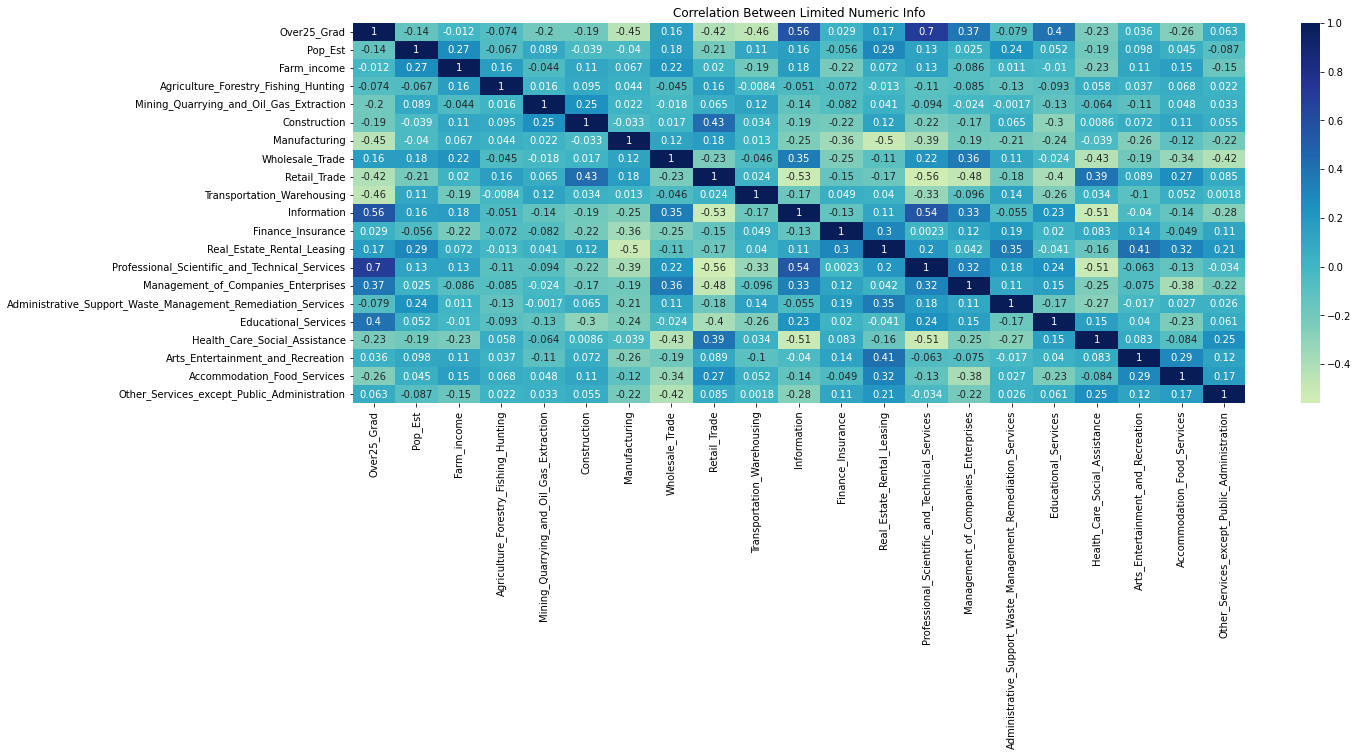

In [64]:
# some high VIFS
my_corr3 = num_vars_3.corr()
plt.figure(figsize = (20,7))
sns.heatmap(my_corr3, center=0,  annot=True, cmap='YlGnBu')
plt.title("Correlation Between Limited Numeric Info")